## Drop UPC, FinelineNumber, ['HEALTH AND BEAUTY AIDS']

In [9]:
train = pd.read_csv("data/mytrain.csv")
test = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

In [2]:
print(len(sample_submission))
sample_submission.head()

95674


,VisitNumber,TripType_3,TripType_4,TripType_5,TripType_6,TripType_7,TripType_8,TripType_9,TripType_12,TripType_14,...,TripType_36,TripType_37,TripType_38,TripType_39,TripType_40,TripType_41,TripType_42,TripType_43,TripType_44,TripType_999
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
len(train["VisitNumber"].unique()), len(test["VisitNumber"].unique())

(95674, 95674)

### Feature Engineering

In [4]:
def transform_my_data(data):
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data['Weekday'] = data['Weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, 
                                           "Saturday": 6, "Sunday": 7})
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    #data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    #data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'NumItems': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum, 'MENS WEAR': np.sum, 'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["TripType", "Weekday", "NumItems", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    data['TripType'] = data['TripType'].map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6, 12:7, 14:8, 15:9,  
                                         18:10, 19:11, 20:12, 21:13, 22:14, 23:15, 24:16, 25:17, 26:18,  
                                         27:19, 28:20, 29:21, 30:22, 31:23, 32:24, 33:25, 34:26, 35:27, 
                                         36:28, 37:29, 38:30, 39:31, 40:32, 41:33, 42:34, 43:35, 44:36, 999:37})
    return data

In [5]:
tf_train = transform_my_data(train)
tf_train.head()

,TripType,Weekday,NumItems,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5.0,37,5,-1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,22,5,2.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8.0,18,5,28.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.0,5,5,3.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.0,5,5,3.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def transform_w_data(data):
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data['Weekday'] = data['Weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5,
                                           "Saturday": 6, "Sunday": 7})
    data_dummies = data.iloc[:,6:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)
    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, 'NumItems': np.sum, 'Return': np.max, 
                '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
           'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
           'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
           'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
           'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
           'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
           'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
           'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HOME DECOR': np.sum,
           'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
           'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
           'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
           'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
           'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
           'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum, 'MENS WEAR': np.sum, 'MENSWEAR': np.sum,
           'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
           'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
           'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
           'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
           'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
           'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
           'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["Weekday", "NumItems", "Return", '1-HR PHOTO', 'ACCESSORIES',
               'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
               'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
               'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
               'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
               'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
               'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
               'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
               'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
               'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
               'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
               'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
               'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
               'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
               'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
               'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
               'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
               'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
               'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
               'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
               'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    #data['TripType'] = data['TripType'].map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6, 12:7, 14:8, 15:9,  
                                         #18:10, 19:11, 20:12, 21:13, 22:14, 23:15, 24:16, 25:17, 26:18,  
                                         #27:19, 28:20, 29:21, 30:22, 31:23, 32:24, 33:25, 34:26, 35:27, 
                                         #36:28, 37:29, 38:30, 39:31, 40:32, 41:33, 42:34, 43:35, 44:36, 999:37})
    return data

In [11]:
tf_test = transform_w_data(test)
tf_test.head()

,Weekday,NumItems,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
1,5,4,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,4,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def add_category_counts(data):
    alist = []
    for array in np.asarray(data.iloc[:,4:]):
        count = 0
        for item in array:
            if item > 0:
                count += 1
        alist.append(count)
    cat_counts = pd.DataFrame(alist)
    cat_counts = cat_counts.rename(columns={0:"CategoryCount"})
    cat_counts = cat_counts.set_index(data.index)
    data.insert(4, 'CategoryCounts', cat_counts)
    return data

def add_category_counts_test(data):
    alist = []
    for array in np.asarray(data.iloc[:,3:]):
        count = 0
        for item in array:
            if item > 0:
                count += 1
        alist.append(count)
    cat_counts = pd.DataFrame(alist)
    cat_counts = cat_counts.rename(columns={0:"CategoryCount"})
    cat_counts = cat_counts.set_index(data.index)
    data.insert(3, 'CategoryCounts', cat_counts)
    return data

In [14]:
tf_train = add_category_counts(tf_train)

In [15]:
tf_train.head()

,TripType,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5.0,37,5,-1.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,22,5,2.0,0.0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8.0,18,5,28.0,1.0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.0,5,5,3.0,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.0,5,5,3.0,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
len(tf_train)

95674

In [17]:
tf_test = add_category_counts_test(tf_test)

In [86]:
tf_test.head()

,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
1,5,4,0.0,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,4,0.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
len(tf_test)

95674

In [20]:
a = tf_train.columns.unique()
b = tf_test.columns.unique()
set(a) - set(b)

{'TripType'}

In [21]:
len(a), len(b)

(72, 71)

In [66]:
tf_train_col = tf_train.drop(['TripType'], axis=1)
dfX = tf_train_col
dfy = tf_train.TripType

### Logistic Regression

In [65]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [67]:
Logistic = LogisticRegression().fit(dfX, dfy)

In [68]:
prediction_LR = Logistic.predict(tf_test)

In [82]:
len(prediction_LR)

95674

In [83]:
set(prediction_LR)

{0,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37}

In [84]:
def prediction_to_csv(prediction):
    df_VN = pd.DataFrame(columns=["VisitNumber"])
    df_VN["VisitNumber"] = tf_test.index
    df_TT = pd.DataFrame(columns=["TripType"])
    df_TT["TripType"] = prediction
    df_TT = pd.get_dummies(df_TT.TripType).astype(int, cbopy=False)
    df_TT = df_TT.rename(columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"})
    trial = pd.concat([df_VN, df_TT], axis=1).set_index('VisitNumber')
    trial["TripType_4"] = 0
    trial["TripType_14"] = 0
    return trial.to_csv("data/trial_4.csv")

In [85]:
prediction_to_csv(prediction_LR)

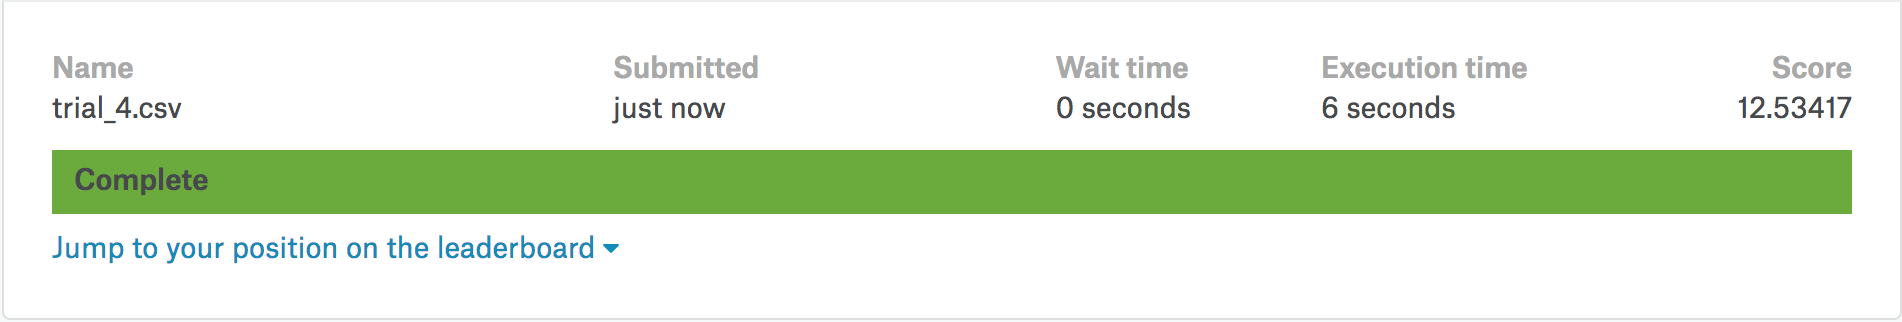

### Random Forest

In [22]:
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import sklearn

In [87]:
forest = RandomForestClassifier(n_estimators = 400, max_features=2)

In [88]:
forest = forest.fit(dfX, dfy)

In [95]:
prediction_RF = forest.predict(tf_test)

In [96]:
len(prediction_RF)

95674

In [97]:
set(prediction_RF)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37}

### Modeling the test data and Exporting to CSV

In [98]:
def prediction_to_csv(prediction):
    df_VN = pd.DataFrame(columns=["VisitNumber"])
    df_VN["VisitNumber"] = tf_test.index
    df_TT = pd.DataFrame(columns=["TripType"])
    df_TT["TripType"] = prediction
    df_TT = pd.get_dummies(df_TT.TripType).astype(int, cbopy=False)
    df_TT = df_TT.rename(columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"})
    trial = pd.concat([df_VN, df_TT], axis=1).set_index('VisitNumber')
    trial["TripType_14"] = 0
    return trial.to_csv("data/trial_3.csv")

In [99]:
prediction_to_csv(prediction_RF)

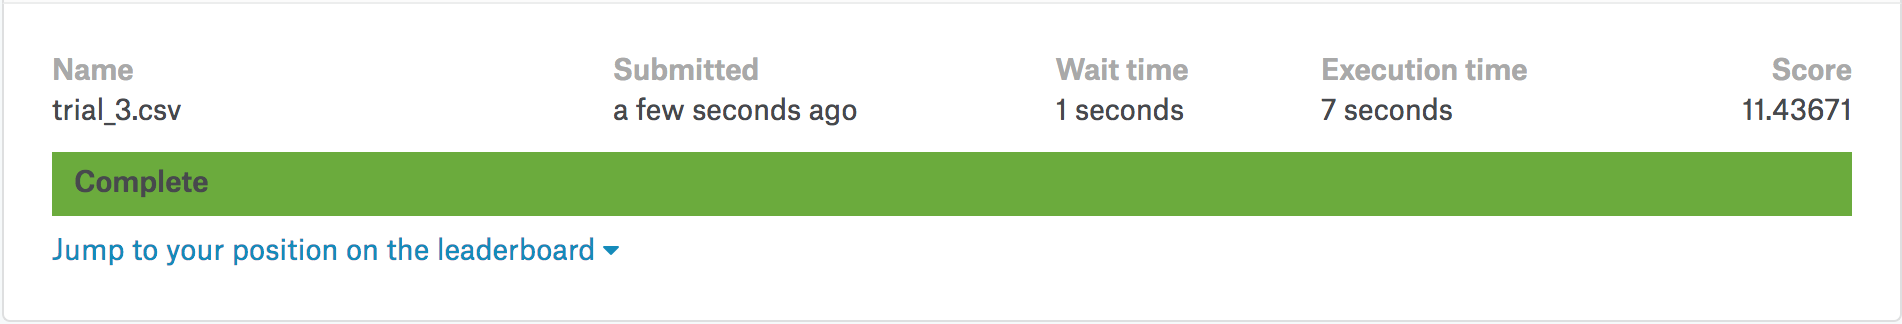